## Import package

In [2]:
# import package
import numpy as np # useful for many scientific computing in Python
import pandas as pd # primary data structure library

%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [51]:
df = pd.read_csv('london_crime_by_lsoa.csv')

print('Data read into a pandas dataframe!')
df.head(3)

Data read into a pandas dataframe!


,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5


### Info Dataset

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


## Data Collection

## Data Analysis

## Data Cleaning

In [50]:
# mengecek missing value
df.isnull().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

In [44]:
df[
    (df["year"] >= 2011)
].groupby("borough")["value"].sum()

In [15]:
df.groupby("year", sort=True)["value"].sum()

year
2008    738641
2009    717214
2010    715324
2011    724915
2012    737329
2013    686407
2014    680183
2015    711624
2016    736121
Name: value, dtype: int64

In [13]:
df.groupby("borough", sort=False)["value"].sum()

borough
Croydon                   260294
Greenwich                 181568
Bromley                   184349
Redbridge                 183562
Wandsworth                204741
Ealing                    251562
Hounslow                  186772
Newham                    262024
Sutton                    100987
Haringey                  213272
Lambeth                   292178
Richmond upon Thames       96771
Hillingdon                209680
Havering                  138947
Barking and Dagenham      149447
Kingston upon Thames       89306
Westminster               455028
Hackney                   217119
Enfield                   193880
Harrow                    116848
Lewisham                  215137
Brent                     227551
Southwark                 278809
Barnet                    212191
Waltham Forest            203879
Camden                    275147
Bexley                    114136
Kensington and Chelsea    171981
Islington                 230286
Tower Hamlets             228613
Ha

In [4]:
totvalue = df['value']
totvalue.sum()

6447758

In [5]:
df1 = df[['borough', 'value', 'year']]
df1

,borough,value,year
0,Croydon,0,2016
1,Greenwich,0,2016
2,Bromley,0,2015
3,Redbridge,0,2016
4,Wandsworth,0,2008
...,...,...,...
13490599,Brent,0,2015
13490600,Hillingdon,1,2015
13490601,Sutton,0,2011
13490602,Croydon,0,2011


In [6]:
locr = df1.groupby(df1['year']).sum()
locr.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5776\2231275642.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  locr = df1.groupby(df1['year']).sum()


,value
year,
2008,738641
2009,717214
2010,715324
2011,724915
2012,737329


In [7]:
df_top3 = locr.sort_values('value', ascending=False, axis=0)
df_top3.head(3)

,value
year,
2008,738641
2012,737329
2016,736121


What is the change in the number of crime incidents from 2011 to 2016?

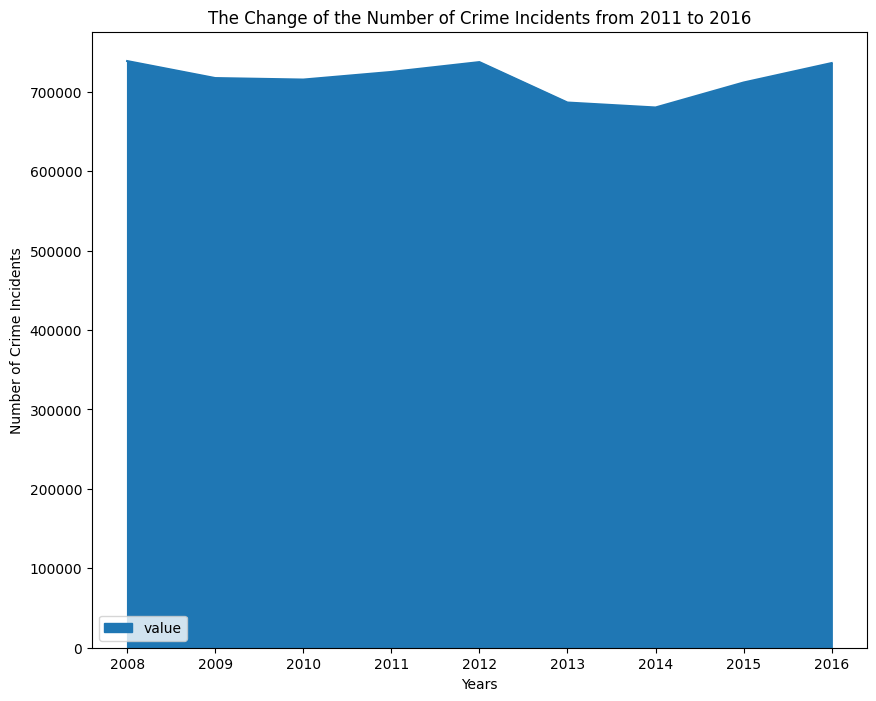

In [8]:
locr.index = locr.index.map(int)

locr.plot(kind='area',
                figsize=(10, 8))

plt.title('The Change of the Number of Crime Incidents from 2011 to 2016')
plt.ylabel('Number of Crime Incidents')
plt.xlabel('Years')

plt.show()

## Visualizing the Data